In [1]:
!pip3 install ipython-autotime
!pip3 install pickle5
# !pip3 install --upgrade nltk
%load_ext autotime

import pandas as pd
import numpy as np
my_dir='/YOUR-DIR/'
data_path = 'Datasets/users_tweets/'

import os
from datetime import datetime
import pickle5

import os

# !pip3 install umap-learn

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255316 sha256=9297d23bcada6e5981191c1041021fa51e7d79dfd6996beae1aeddc158a59b78
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5
time: 1.28 s (started: 2023-11-20 15:33:48 +00:00)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 22.7 s (started: 2023-11-20 15:33:49 +00:00)


## Validation on Congresspeople

In [ ]:
data_users_df = pd.read_hdf(my_dir+'Datasets/User_lists/congresspeople_list.hdf')
data_users_df=data_users_df[data_users_df['average_embedding'].map(len)>2]
data_users_df=data_users_df[data_users_df['party']!='I']

time: 24.9 ms (started: 2022-06-29 10:15:38 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_users_df['average_embedding'], data_users_df['party'],test_size=0.5, random_state=1)
# clf = LogisticRegression()
clf = svm.LinearSVC()
clf.fit(list(X_train), y_train)
pred = clf.predict(list(X_test))
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           D       0.95      0.91      0.93       133
           R       0.92      0.96      0.94       136

    accuracy                           0.93       269
   macro avg       0.93      0.93      0.93       269
weighted avg       0.93      0.93      0.93       269

time: 71.9 ms (started: 2022-07-06 12:40:30 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_users_df['average_embedding'], data_users_df['party'],test_size=0.3, random_state=1)

import umap.umap_ as umap
manifold = umap.UMAP(n_components=100,
                  n_neighbors = 15,
                  metric='cosine', verbose=True,
                  random_state=1).fit(list(X_train))
X_train = manifold.transform(list(X_train))
X_test = manifold.transform(list(X_test))

clf = LogisticRegression()
clf = svm.LinearSVC()
clf.fit(list(X_train), y_train)
pred = clf.predict(list(X_test))
print(classification_report(y_test, pred))

UMAP(angular_rp_forest=True, metric='cosine', n_components=100, random_state=1, verbose=True)
Wed Jun 29 10:27:34 2022 Construct fuzzy simplicial set
Wed Jun 29 10:27:34 2022 Finding Nearest Neighbors
Wed Jun 29 10:27:34 2022 Finished Nearest Neighbor Search
Wed Jun 29 10:27:34 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Jun 29 10:27:38 2022 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

              precision    recall  f1-score   support

           D       0.82      0.94      0.87        81
           R       0.92      0.78      0.85        77

    accuracy                           0.86       158
   macro avg       0.87      0.86      0.86       158
weighted avg       0.87      0.86      0.86       158

time: 10.9 s (started: 2022-06-29 10:27:34 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Pairwise Separability for Hashtag Users

Mounted at /content/drive
time: 17.6 s (started: 2023-11-07 11:43:17 +00:00)


In [ ]:
from pandas.core.common import random_state
user_list_df = pd.read_hdf(my_dir+'Datasets/User_lists/hashtag_users_list.hdf')
user_list_df_=user_list_df[user_list_df['average_embedding'].map(len)>2]

user_list_df__=user_list_df_[user_list_df_['hashtag']!='Anti-Abortion'].groupby('hashtag', group_keys=False).apply(lambda x: x.sample(1500,random_state=1))
user_list_df_=pd.concat([user_list_df__,user_list_df_[user_list_df_['hashtag']=='Anti-Abortion']])

user_list_df_['hashtag'].value_counts()

Anti-Gun            1500
Pro-Abortion        1500
Pro-Gun             1500
StandWithUkraine    1500
Anti-Abortion        729
Name: hashtag, dtype: int64

time: 5.47 s (started: 2022-08-05 11:13:34 +00:00)


In [ ]:
user_list_df[user_list_df['average_embedding'].map(len)>2]['hashtag'].value_counts()

Anti-Gun            5089
Pro-Abortion        3793
StandWithUkraine    2989
Pro-Gun             1909
Anti-Abortion        729
Name: hashtag, dtype: int64

time: 24.9 ms (started: 2022-07-04 16:09:33 +00:00)


In [ ]:
from itertools import combinations

all_pairs = list(combinations(set(user_list_df_['hashtag']), 2))
all_pairs

[('Pro-Gun', 'StandWithUkraine'),
 ('Pro-Gun', 'Pro-Abortion'),
 ('Pro-Gun', 'Anti-Abortion'),
 ('Pro-Gun', 'Anti-Gun'),
 ('StandWithUkraine', 'Pro-Abortion'),
 ('StandWithUkraine', 'Anti-Abortion'),
 ('StandWithUkraine', 'Anti-Gun'),
 ('Pro-Abortion', 'Anti-Abortion'),
 ('Pro-Abortion', 'Anti-Gun'),
 ('Anti-Abortion', 'Anti-Gun')]

time: 7.3 ms (started: 2022-08-05 11:13:49 +00:00)


In [ ]:
user_list_df.drop_duplicates('user_id')

,user_screen_name_old,hashtag,user_id,user_info,average_embedding
0,1215jorge,Pro-Gun,191707978,"{'id': 191707978, 'id_str': '191707978', 'name...","[-0.0046667918, 0.05530896, 0.0020495367, 0.00..."
1,125LolaLola,Pro-Gun,37808197,"{'id': 37808197, 'id_str': '37808197', 'name':...","[-0.01883486, 0.07484672, 0.0042844554, 0.0088..."
2,1Egetfl,Pro-Gun,833080577582624768,"{'id': 833080577582624768, 'id_str': '83308057...","[-0.009108344, 0.063201874, 0.0027614383, 0.00..."
3,45LVNancy,Pro-Gun,1477071867219304449,"{'id': 1477071867219304449, 'id_str': '1477071...","[-0.017589265, 0.07834912, 0.0033631946, 0.005..."
4,1libertyboi,Pro-Gun,1150064718758981632,"{'id': 1150064718758981632, 'id_str': '1150064...","[-0.014149628, 0.07611318, 0.0047517954, 0.002..."
...,...,...,...,...,...
21389,AlanJacobson14,StandWithUkraine,946898080170835968,"{'id': 946898080170835968, 'id_str': '94689808...",[0]
21390,edwards_lill,StandWithUkraine,1134106780366180352,"{'id': 1134106780366180352, 'id_str': '1134106...","[-0.019277696, 0.07905936, 0.005222643, 0.0037..."
21391,MrsNDpendent,StandWithUkraine,22256226,"{'id': 22256226, 'id_str': '22256226', 'name':...","[-0.005334577, 0.07084483, 0.005182821, -0.001..."
21393,sme1965,StandWithUkraine,793818497713213440,"{'id': 793818497713213440, 'id_str': '79381849...","[0.0077153877, 0.039057262, -0.010893657, 0.01..."


time: 58.7 ms (started: 2022-07-04 17:14:34 +00:00)


In [ ]:
for x,y in all_pairs:
  user_list_df_x = user_list_df_[(user_list_df_['hashtag']==x) | (user_list_df_['hashtag']==y)]
  user_list_df_x = user_list_df_x.drop_duplicates('user_id')
  X_train, X_test, y_train, y_test = train_test_split(user_list_df_x['average_embedding'], user_list_df_x['hashtag'],test_size=0.5, random_state=1)
  # clf = LogisticRegression()
  clf = svm.LinearSVC()
  clf.fit(list(X_train), y_train)
  pred = clf.predict(list(X_test))
  f_x = f1_score(y_test, pred, average='macro')
  print(f'{x} vs {y}   f1_score = {f_x}')

Pro-Gun vs StandWithUkraine   f1_score = 0.8265101902004566
Pro-Gun vs Pro-Abortion   f1_score = 0.77484291101214
Pro-Gun vs Anti-Abortion   f1_score = 0.6037429532161925
Pro-Gun vs Anti-Gun   f1_score = 0.8203553660270078
StandWithUkraine vs Pro-Abortion   f1_score = 0.738606853493577
StandWithUkraine vs Anti-Abortion   f1_score = 0.8982568896312568
StandWithUkraine vs Anti-Gun   f1_score = 0.7661896533102928
Pro-Abortion vs Anti-Abortion   f1_score = 0.8676042598626508
Pro-Abortion vs Anti-Gun   f1_score = 0.6964970471644689
Anti-Abortion vs Anti-Gun   f1_score = 0.9111616244463713
time: 1.74 s (started: 2022-08-05 11:14:22 +00:00)


## Pairwise Separability for Network Users

In [3]:
# choose the topic between the 4

# topic = 'abortion'
# topic = 'gun'
# topic = 'ukraine'
topic = 'sxsw'

from pandas.core.common import random_state
pd.read_hdf(my_dir+f'Datasets/echo_chambers_in_{topic}_dataset.hdf')

user_list_df_=user_list_df[user_list_df['average_embedding'].map(len)>2]

user_list_df_=user_list_df_.groupby(topic, group_keys=False).apply(lambda x: x.sample(1500,random_state=1))

user_list_df_[topic].value_counts()

0    2096
1    1333
Name: sxsw, dtype: int64

time: 4.34 s (started: 2023-11-20 15:34:15 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(list(user_list_df_['average_embedding']), user_list_df_[topic],test_size=0.5, random_state=1)
# clf = LogisticRegression()
clf = svm.LinearSVC()
# clf = svm.SVC()


clf.fit(list(X_train), y_train)
pred = clf.predict(list(X_test))
f_x = f1_score(y_test, pred, average='macro')
print(f'0 vs 1   f1_score = {f_x}')

0 vs 1   f1_score = 0.8224036174161036
time: 187 ms (started: 2023-11-07 12:24:16 +00:00)


In [ ]:
np.asarray(X_test).shape

(1715, 768)

time: 15.1 ms (started: 2023-11-07 11:58:00 +00:00)


In [ ]:
# Get the coefficients and intercept of the hyperplane
w = clf.coef_
b = clf.intercept_

# Calculate distances for all data points
distances = np.abs(np.dot(X_test, w.T) + b) / np.linalg.norm(w)
normalized_confidence = 1 / (1 + np.exp(-np.abs(clf.decision_function(X_test))))
# Predict labels
# predicted_labels = clf.predict(X_test)

# Assign weights (1 for correctly classified, -1 for misclassified)
weights = np.where(pred == y_test, 1, -1)

# Calculate the weighted average of distances
# weighted_average_distance = np.sum(distances * weights) / np.sum(np.abs(weights))
weighted_average_distance = np.sum(normalized_confidence * weights) / np.sum(np.abs(weights))

print(f"Weighted Average Distance: {weighted_average_distance:.2f}")

Weighted Average Distance: 0.45
time: 14.7 ms (started: 2023-11-07 12:24:38 +00:00)


In [ ]:
np.abs(clf.decision_function(X_test))

array([0.65433465, 1.04956195, 0.92916024, ..., 0.77046677, 0.91811852,
       1.07541215])

time: 12.6 ms (started: 2023-11-07 12:21:00 +00:00)


In [ ]:
normalized_confidence = 1 / (1 + np.exp(-np.abs(clf.decision_function(X_test))))
normalized_confidence

array([0.6579866 , 0.74069077, 0.71690489, ..., 0.68362186, 0.71465859,
       0.74562479])

time: 24.8 ms (started: 2023-11-07 12:21:17 +00:00)


In [ ]:
pred

array([1, 1, 0, ..., 0, 0, 0])

time: 7.41 ms (started: 2023-11-07 12:16:42 +00:00)


In [ ]:
margins = 2 / np.linalg.norm(w)

# Compute the overall separability by taking the average or minimum margin
overall_separability = np.mean(margins)  # You can also use np.min(margins)

print(f"Overall Separability: {overall_separability:.2f}")

Overall Separability: 0.11
time: 2.02 ms (started: 2023-11-07 12:11:23 +00:00)


## Chamber-Wise Separability

In [ ]:
topics = ['abortion','gun','ukraine','sxsw']

from itertools import combinations

all_pairs = list(combinations(topics, 2))
all_pairs

[('abortion', 'gun'),
 ('abortion', 'ukraine'),
 ('abortion', 'sxsw'),
 ('gun', 'ukraine'),
 ('gun', 'sxsw'),
 ('ukraine', 'sxsw')]

time: 10.5 ms (started: 2022-08-02 17:31:52 +00:00)


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

time: 1.61 ms (started: 2022-08-02 17:31:55 +00:00)


In [ ]:
for topic_a, topic_b in all_pairs:
  user_list_df_a = pd.read_hdf(my_dir+f'Datasets/echo_chambers_in_{topic_a}_dataset.hdf')
  user_list_df_a=user_list_df_a[user_list_df_a['average_embedding'].map(len)>2]
  user_list_df_a=user_list_df_a.groupby(topic_a, group_keys=False).apply(lambda x: x.sample(1500,random_state=2))
  user_list_df_b = pd.read_hdf(my_dir+f'Datasets/echo_chambers_in_{topic_b}_dataset.hdf')
  user_list_df_b=user_list_df_b[user_list_df_b['average_embedding'].map(len)>2]
  user_list_df_b=user_list_df_b.groupby(topic_b, group_keys=False).apply(lambda x: x.sample(1500,random_state=2))

  for x,y in [(0, 0), (1, 1), (0, 1), (1, 0)]:
    user_list_df_a_ = user_list_df_a[user_list_df_a[topic_a]==x]#.rename({topic_a:'chamber'},axis=1)
    user_list_df_a_['chamber']=0
    user_list_df_b_ = user_list_df_b[user_list_df_b[topic_b]==y]#.rename({topic_b:'chamber'},axis=1)
    user_list_df_b_['chamber']=1
    user_list_df_x = pd.concat([user_list_df_a_,user_list_df_b_])
    X_train, X_test, y_train, y_test = train_test_split(user_list_df_x['average_embedding'], user_list_df_x['chamber'],test_size=0.5, random_state=1)
    # clf = LogisticRegression()
    clf = svm.LinearSVC()
    clf.fit(list(X_train), y_train)
    pred = clf.predict(list(X_test))
    f_x = f1_score(y_test, pred, average='macro')
    print(f'{topic_a}{x} vs {topic_b}{y}   f1_score = {f_x}')

abortion0 vs gun0   f1_score = 0.7643724988218625
abortion1 vs gun1   f1_score = 0.6879201075475321
abortion0 vs gun1   f1_score = 0.9139861995635744
abortion1 vs gun0   f1_score = 0.9133308680780253
abortion0 vs ukraine0   f1_score = 0.8086420878059448
abortion1 vs ukraine1   f1_score = 0.7982272504565497
abortion0 vs ukraine1   f1_score = 0.9086598060032065
abortion1 vs ukraine0   f1_score = 0.8933325748094207
abortion0 vs sxsw0   f1_score = 0.8222796311968286
abortion1 vs sxsw1   f1_score = 0.9639994239907839
abortion0 vs sxsw1   f1_score = 0.9659974460303906
abortion1 vs sxsw0   f1_score = 0.9066241702890561
gun0 vs ukraine0   f1_score = 0.7697338122870039
gun1 vs ukraine1   f1_score = 0.7846446009752939
gun0 vs ukraine1   f1_score = 0.9279629889845626
gun1 vs ukraine0   f1_score = 0.9113301412184172
gun0 vs sxsw0   f1_score = 0.8492464993169399
gun1 vs sxsw1   f1_score = 0.9766661585074519
gun0 vs sxsw1   f1_score = 0.9699993466524383
gun1 vs sxsw0   f1_score = 0.9259973359040925


# Centeroid Distance

In [ ]:
centroids=user_list_df_.groupby(topic)['average_embedding'].mean()

time: 10.3 ms (started: 2022-07-30 21:04:21 +00:00)


In [ ]:
from scipy import spatial
spatial.distance.cosine(centroids[0], centroids[1])

0.028302669525146484

time: 10.3 ms (started: 2022-07-30 21:04:22 +00:00)


In [ ]:
def get_bootstrap_confidence_average(df_x, column_x, confidence_x, sample_size_x):
  values=[]
  for i in range(1000):
    boot_df=df_x.groupby(topic, group_keys=False).apply(lambda x: x.sample(sample_size_x,random_state=i,replace=True))
    centroids=boot_df.groupby(topic)[column_x].mean()
    values.append(spatial.distance.cosine(centroids[0], centroids[1]))
  return np.percentile(values,[100*(1-confidence_x)/2,100*(1-(1-confidence_x)/2)])

time: 8.09 ms (started: 2022-07-30 21:03:07 +00:00)


In [ ]:
get_bootstrap_confidence_average(df_x = user_list_df_, column_x = 'average_embedding', confidence_x = 0.95, sample_size_x = 1500)

array([0.1616439 , 0.18288034])

time: 10.6 s (started: 2022-07-29 02:40:03 +00:00)


# Variance Calculation

In [ ]:
# graph_colors_dict = {1:'blue',0:'red'}
# name_dict = {1:'Chamber A',0:'Chamber B'}

graph_colors_dict = {0:'blue',1:'red'}
name_dict = {0:'Chamber A',1:'Chamber B'}
graph_colors_dict = {'StandWithUkraine':'yellow','Pro-Gun':'red','Anti-Gun':'blue','Pro-Abortion':'deepskyblue','Anti-Abortion':'deeppink'}

data = [[2,2],[0,0]]

print(np.std(data,axis=0).mean())

1.0
time: 2.66 ms (started: 2023-11-06 17:56:55 +00:00)


In [ ]:
def get_bootstrap_confidence_variance(df_x, column_x, confidence_x, sample_size_x):
  values = [np.var(list(df_x.sample(n=sample_size_x, random_state=i, replace=True)[column_x]),axis=0).mean() for i in range(1000)]
  return np.percentile(values,[100*(1-confidence_x)/2,100*(1-(1-confidence_x)/2)])


time: 1.08 ms (started: 2023-11-06 17:56:57 +00:00)


In [ ]:
group_column = topic
# group_column = 'hashtag'

CIs={}
for hashtag_x in list(set(user_list_df_[group_column])):
  print(f'std for {hashtag_x} is:')
  data = user_list_df_[user_list_df_[group_column]==hashtag_x]
  print(np.var(list(user_list_df_[user_list_df_[group_column]==hashtag_x]['average_embedding']),axis=0).mean())
  CI_x = get_bootstrap_confidence_variance(df_x = data, column_x = 'average_embedding', confidence_x = 0.95, sample_size_x =700)
  CIs.update({hashtag_x:CI_x})
  print(CI_x)

CIs = pd.DataFrame.from_dict(CIs).T.reset_index().rename({'index':group_column,0:'LL',1:'UL'},axis=1)
CIs['mean'] = (CIs['LL']+CIs['UL'])/2
CIs['color']=CIs[group_column].map(graph_colors_dict)
CIs

std for 0 is:
0.00014993799
[0.00014175 0.00015675]
std for 1 is:
0.00019635439
[0.00018954 0.00020341]


,sxsw,LL,UL,mean,color
0,0,0.000142,0.000157,0.000149,NaN
1,1,0.000190,0.000203,0.000196,NaN


time: 8.03 s (started: 2023-11-06 17:57:17 +00:00)


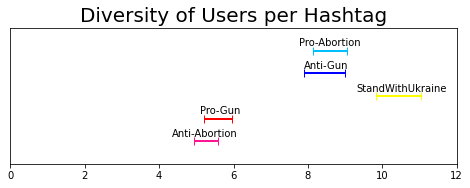

time: 2.57 s (started: 2022-08-05 11:38:21 +00:00)


In [ ]:
import matplotlib.pyplot as plt
y_dummy_dict = {'StandWithUkraine':3,'Pro-Gun':2,'Anti-Gun':4,'Pro-Abortion':5,'Anti-Abortion':1}
# y_dummy=list(range(1,len(CIs.keys())+1))
CIs['y_dummy']=CIs[group_column].map(y_dummy_dict)
plt.figure(figsize=(8,2.5))
plt.tick_params(left = False)
ax = plt.gca()
for i, txt in enumerate(CIs[group_column]):
    ax.errorbar(x=CIs['mean'][i]*100000, y = CIs['y_dummy'][i], xerr=(CIs['mean'][i]-CIs['LL'][i])*100000,markersize='4',capsize=4, elinewidth=2, yerr=None, fmt='o',color='none',ecolor=CIs['color'][i])#,markerfacecolor=CIs['color'],markeredgecolor=CIs['color'], color=CIs['color'])
    ax.annotate(txt, ((CIs['mean'][i]-0.0000007*len(txt))*100000, CIs['y_dummy'][i]+0.2),rotation=0)#,color=CIs['color'][i])
plt.ylim(-0.00,6)
plt.xlim(0,12)
ax.axes.yaxis.set_ticklabels([])
# ax.axes.xaxis.set_ticklabels([])
# plt.ylabel('Toxicity Level',fontsize=25, color='darkgreen')
plt.title('Diversity of Users per Hashtag',fontsize=20)
plt.savefig(my_dir+"Charts/HashtagUsers_variance"+".png", bbox_inches = 'tight',format="png", dpi=650)